# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Read The Data

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

## Explore The Data

In [3]:
df.shape


(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum()

0

In [8]:
null=df.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

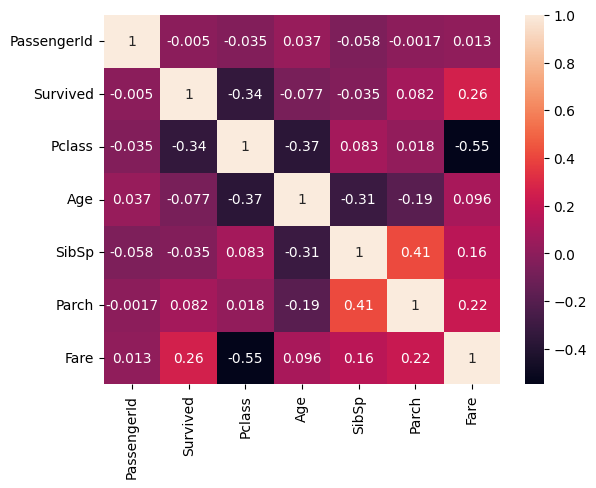

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Cleaning The Data

- **Drop Un-necessary Columns**

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


- **Replace Null Values in Age column**

In [13]:
df.Age.fillna(df.Age.median(),inplace=True)

- **Change In-correct Datatypes**

In [14]:
cols = ["Pclass", "Sex", "Survived"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,Fare
0,category,category,category,float64,float64


## Analysis and Visualization

In [15]:
def compute_survived_feature_counts(feature):
    counts_df = df[['Survived', feature]].value_counts().reset_index(name='Count')
    return counts_df

In [16]:
def plot_survived_feature_counts(counts_df, feature):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=counts_df, x='Survived', y='Count', hue=feature)
    plt.title(f'Survived Frequency by {feature.capitalize()}')
    plt.xlabel('Survived')
    plt.ylabel('Frequency')
    plt.show()

In [17]:
compute_survived_feature_counts('Sex')

,Survived,Sex,Count
0,0,male,468
1,1,female,233
2,1,male,109
3,0,female,81


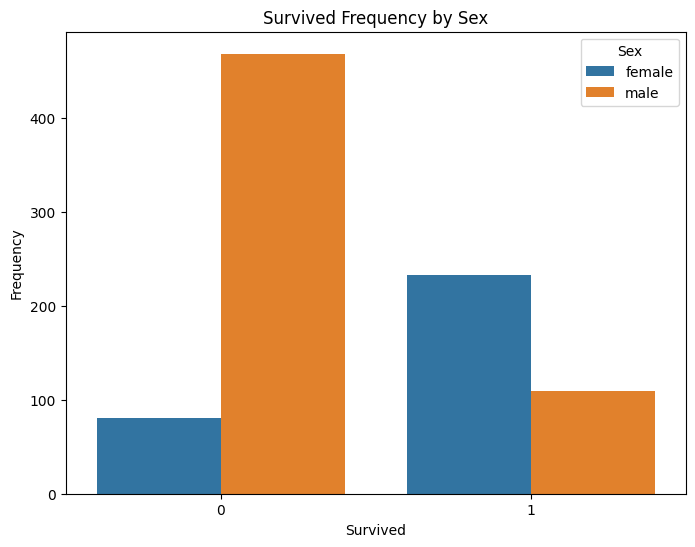

In [18]:
plot_survived_feature_counts(compute_survived_feature_counts('Sex'),'Sex')

In [19]:
compute_survived_feature_counts('Pclass')

,Survived,Pclass,Count
0,0,3,372
1,1,1,136
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


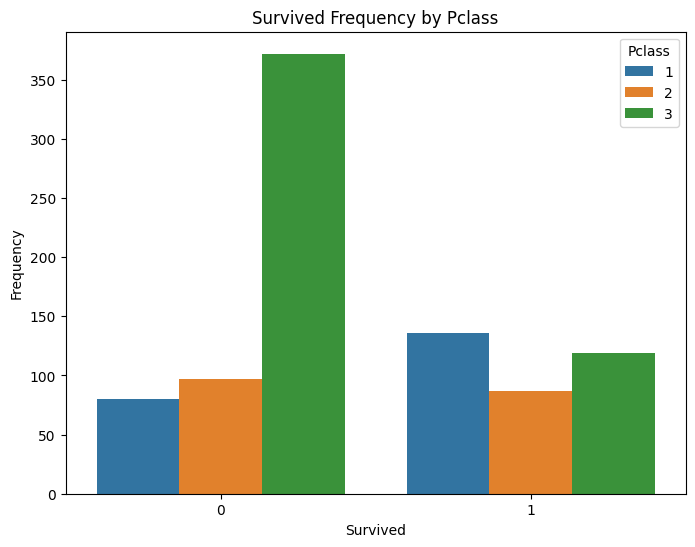

In [20]:
plot_survived_feature_counts(compute_survived_feature_counts('Pclass'),'Pclass')

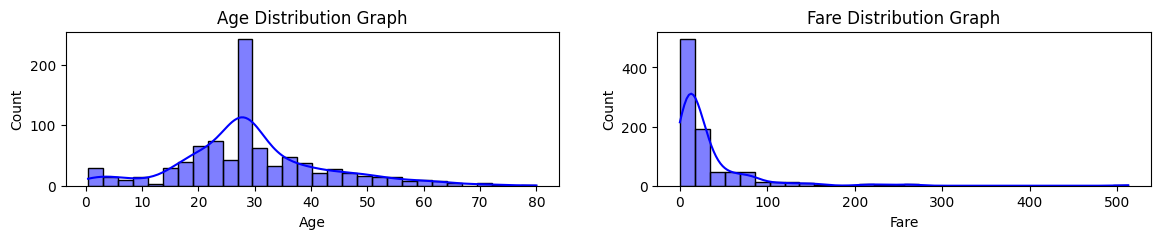

In [21]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"{col} Distribution Graph")
plt.show()

## Build Model

- **Spilting Data**

In [22]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]

In [23]:
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [24]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


- **Scaling Numerical Data**

In [25]:
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

- **Encoding**

In [26]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

In [27]:
X

,Pclass,Sex,Age,Fare
0,3,1,0.271174,0.014151
1,1,0,0.472229,0.139136
2,3,0,0.321438,0.015469
3,1,0,0.434531,0.103644
4,3,1,0.434531,0.015713
...,...,...,...,...
886,2,1,0.334004,0.025374
887,1,0,0.233476,0.058556
888,3,0,0.346569,0.045771
889,1,1,0.321438,0.058556


- **Training**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=35)

In [29]:
X_train

,Pclass,Sex,Age,Fare
465,3,1,0.472229,0.013761
202,3,1,0.421965,0.012679
317,2,1,0.673285,0.027326
599,1,1,0.610455,0.111118
438,1,1,0.798944,0.513342
...,...,...,...,...
249,2,1,0.673285,0.050749
448,3,0,0.057552,0.037590
33,2,1,0.824076,0.020495
271,3,1,0.308872,0.000000


In [30]:
X_test

,Pclass,Sex,Age,Fare
500,3,1,0.208344,0.016908
417,2,0,0.220910,0.025374
432,2,0,0.522493,0.050749
881,3,1,0.409399,0.015412
49,3,0,0.220910,0.034743
...,...,...,...,...
96,1,1,0.886906,0.067640
722,2,1,0.421965,0.025374
582,2,1,0.673285,0.050749
861,2,1,0.258608,0.022447


In [31]:
y_train

,Survived
465,0
202,0
317,0
599,1
438,0
...,...
249,0
448,1
33,0
271,1


In [32]:
y_test

,Survived
500,0
417,1
432,1
881,0
49,0
...,...
96,0
722,0
582,0
861,0


In [33]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

## Evaluate the Model

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[92 14]
 [16 57]]


In [37]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       106
           1       0.80      0.78      0.79        73

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



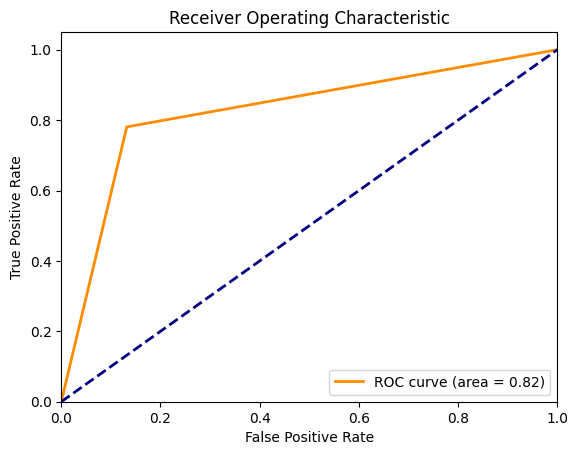

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()